In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv', index_col = "PassengerId")

# Context

# Data quality assessment

#### When quality of the data was assesed, it was found that in five columns not all values were filled:
- Age - 3292 NaN values
- Ticket - 4623 NaN values
- Fare - 134 NaN values
- Cabin - 67866 NaN values
- Embarked - 250 NaN values

#### The missing numerical characteristics are dropped

In [76]:
#values = {"Age": df["Age"].mean(), "Fare": df["Fare"].mean()}
#df.fillna(value = values, inplace = True)
df = df.dropna() # стоит ли так делать?

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S
9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C
11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S
12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S
14,1,1,"Seaton, Karen",female,44.0,0,1,12425,28.40,D6945,C
...,...,...,...,...,...,...,...,...,...,...,...
99967,0,1,"Harrier, Stacey",male,49.0,2,0,402064,225.51,A4590,S
99989,1,1,"Harris, Amy",female,64.0,0,1,27728,31.66,D12975,C
99991,0,1,"Hogan, Todd",male,53.0,0,5,CA 48075,30.09,B19289,Q


#### For convenience, we will cast age to type int

In [126]:
df["Age"] = df.Age.astype(int)

# Data exploration

####   Age statistics

In [209]:
print("Average of age separated by Sex: ")
print(df.groupby('Sex')["Age"].mean())
print("\nAverage of age separated by Pclass: ")
print(df.groupby('Pclass')["Age"].mean())
print("\nAverage of age separated by Pclass and Sex: ")
print(df.groupby(['Pclass', 'Sex'])["Age"].mean())

Average of age separated by Sex: 
Sex
female    46.605823
male      41.949524
Name: Age, dtype: float64

Average of age separated by Pclass: 
Pclass
1    45.142588
2    43.422644
3    39.425532
Name: Age, dtype: float64

Average of age separated by Pclass and Sex: 
Pclass  Sex   
1       female    47.221015
        male      42.459596
2       female    44.509251
        male      41.188406
3       female    41.623472
        male      37.931006
Name: Age, dtype: float64


Text(0.5, 1.0, 'Passenger age distribution')

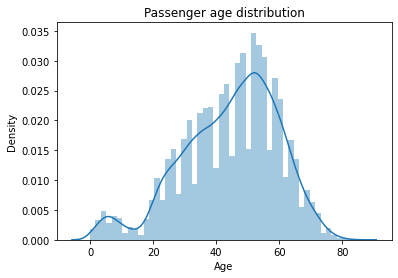

In [207]:
sns.distplot(df.Age)
plt.title("Passenger age distribution")

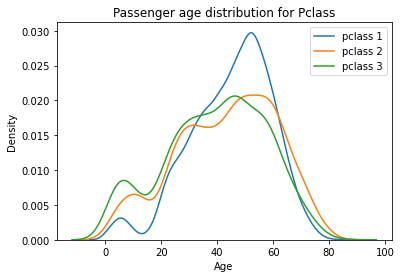

In [208]:
plt.title("Passenger age distribution for Pclass")
sns.kdeplot(df[df.Pclass == 1].Age, label = "pclass 1")
sns.kdeplot(df[df.Pclass == 2].Age, label = "pclass 2")
sns.kdeplot(df[df.Pclass == 3].Age, label = "pclass 3")
plt.legend()

Text(0.5, 1.0, 'Survival rate for Age:')

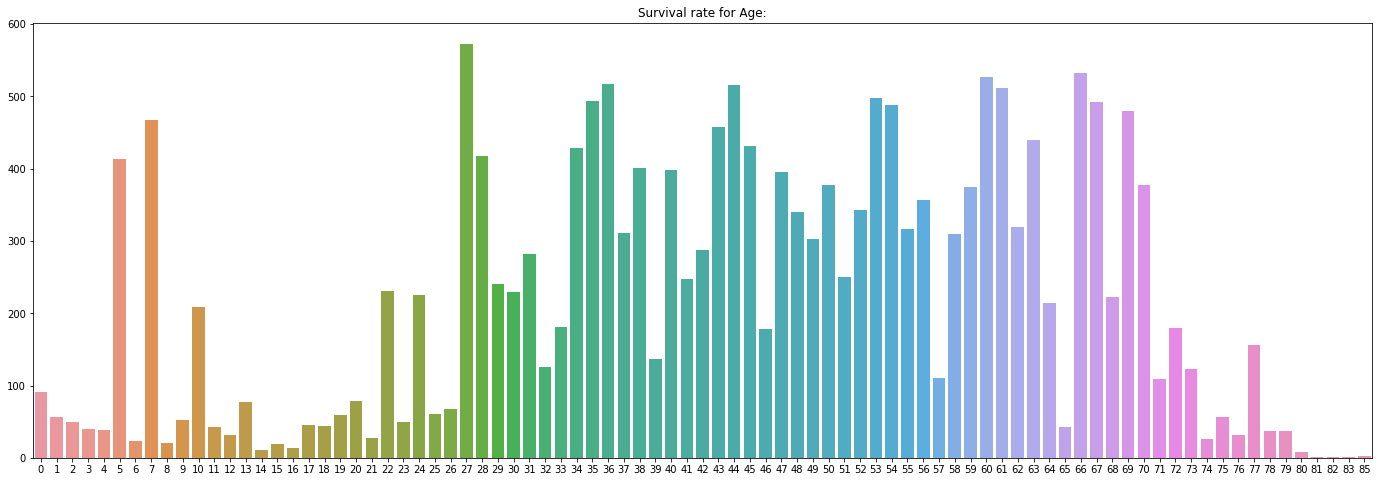

In [210]:
num_of_survived = df[df.Survived == 1].Age.value_counts().to_list()
plt.figure(figsize = (24, 8))
sns.barplot(x = df.Age.unique(), y = num_of_survived)
plt.title("Survival rate for Age:")

#### Gender statistics

In [215]:
print("Number of men and women: ")
print(df.Sex.value_counts())


Number of men and women: 
female    17449
male      13432
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Percentage of survivors for gender')

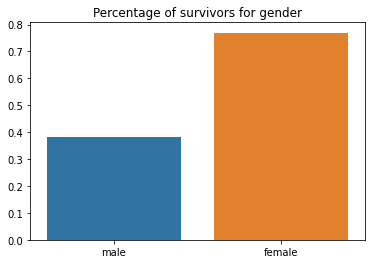

In [128]:
a = df.Sex.value_counts().to_list()
b = df[df.Survived == 1].Sex.value_counts()
percent_of_survivors = [j / i for (i, j) in (a, b)][::-1]
sns.barplot(x = df.Sex.unique(), y = percent_of_survivors)
#plt.title("Percentage of survivors for gender")

In [211]:
# есть ли смысл такого графика ?...


<AxesSubplot:ylabel='Pclass'>

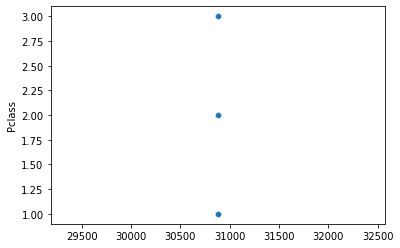

In [169]:
sns.scatterplot(x = df.Survived.count(), y = df.Pclass)

# Summary